In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 7.64744679,  4.74306095],
       [ 6.02235452, -3.99732451],
       [ 5.91292652, -2.0706941 ],
       ...,
       [ 4.97612984,  2.49749011],
       [ 2.59473145,  1.80213896],
       [ 5.9253814 ,  6.09192511]])

In [4]:
y

array([2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,

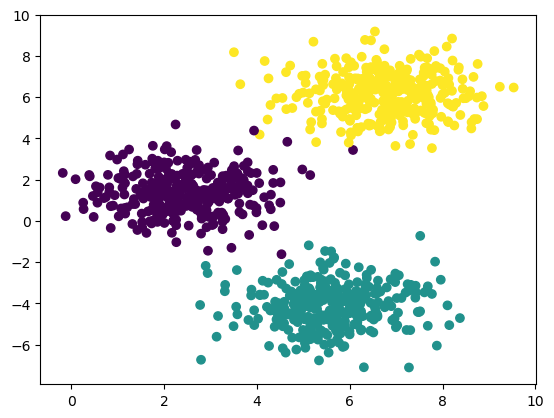

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
##Standardization
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=26)

In [8]:
trained_scaled_data=Scaler.fit_transform(X_train)
test_scaled_data=Scaler.transform(X_test) #For preventing from Data Leakage

In [13]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [18]:
#Elbow method to select the k value
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(trained_scaled_data)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1600.0000000000011,
 972.6201645563629,
 235.7111522271234,
 196.15012368401403,
 159.14131564282215,
 137.10942628385286,
 102.92505937951194,
 92.37357136271218,
 85.43103585307131,
 80.48149148770145,
 68.23595484336214,
 66.68101531298238,
 61.76784585253574,
 58.08488913574015]

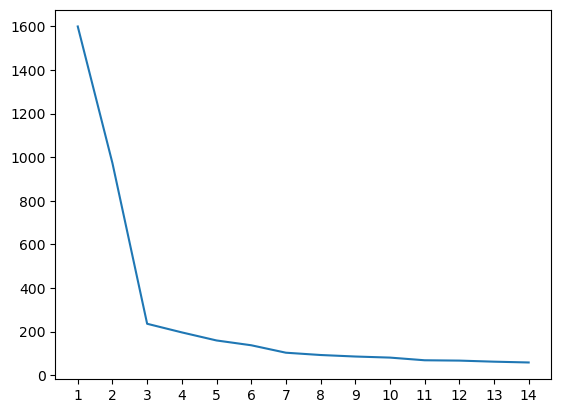

In [20]:
#elbow curve
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel=("Number of Clusters")
plt.ylabel=("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(trained_scaled_data)

array([1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0,
       2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2,
       2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2,

In [23]:
y_pred=kmeans.predict(test_scaled_data)
y_pred

array([0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1,
       0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 1])

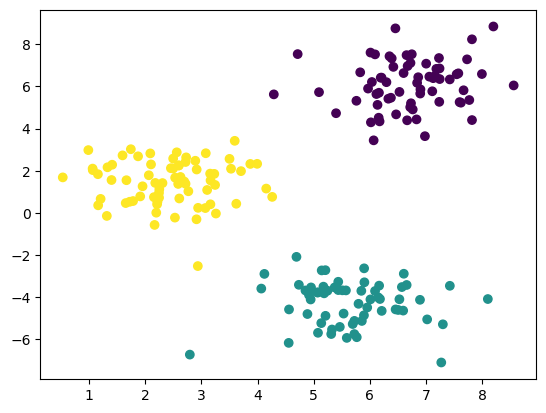

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [26]:
#Other methods for validating K values
#Knee Locator
#Silhoutee scoring

In [40]:
#Knee Locator
!pip install --upgrade kneed

Defaulting to user installation because normal site-packages is not writeable


In [41]:
from kneed import KneeLocator


ModuleNotFoundError: No module named 'kneed'

In [29]:

kl=Kneelocator(range(1,15),wcss,curve="convex",direction="decreasing")
kl.elbow

ModuleNotFoundError: No module named 'kneed'

In [42]:
##Silhoutte score

In [43]:
from sklearn.metrics import silhouette_score

In [49]:
silhouette_coefficients=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(trained_scaled_data)
    score=silhouette_score(trained_scaled_data,kmeans.labels_)
    silhouette_coefficients.append(score)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)